# Problem Set #4
## Ryan McWay

## Question 1

I ran the crop pollination model. This models pollination by four 
bee species. Pollination is important for crop production for 87 of the 
most important crops by facilitating the asexual reproduction of the
floral process for crops. Humans need food to eat, so pollination supports
the agricultural food cycle.

## Question 2

To measure the quantity of the pollinator ecosystem service, we are aiming
to determine the pollinator supply and abudnance. If we wish to go further,
we can use this as an input to the farm information to determine the on-farm
abdundance and crop yield from pollinator inputs. 
To estimate pollinator supply (orgination), we need to know for a pixel x for species s 
the accessible floral resource index, habitat nesting suitability, and 
relative species abudnance index. These first two components are calculated
through a formula of other inputs described in Q3. 
To estimate pollinator abundance (activity), we can again rely on a formula
to estimate through the relative abudnance, accessible floral resources, 
and now the pollinator supply. 

## Question 3

The input values are a LULC map, a biophysical table to determine nesting
of pollinators suitability and floral resources across spring and summer for
each land use type, and a pollinator guild table to tell us what seasons the
pollinator is active, their nesting preferences, mean flight distance, 
and relative abundance of the species. Optionally, you can include a shapefile
for a farm to see how the pollinator will react with a specific farmers inptus.

## Question 4

In [1]:
# InVEST Crop Pollination Script 

import logging
import sys

import natcap.invest.pollination
import natcap.invest.utils

LOGGER = logging.getLogger(__name__)
root_logger = logging.getLogger()

handler = logging.StreamHandler(sys.stdout)
formatter = logging.Formatter(
    fmt=natcap.invest.utils.LOG_FMT,
    datefmt='%m/%d/%Y %H:%M:%S ')
handler.setFormatter(formatter)
logging.basicConfig(level=logging.INFO, handlers=[handler])

args = {
    'farm_vector_path': '',
    'guild_table_path': 'C:\\Users\\ryanm\\Dropbox '
                        '(Personal)\\Github\\base_data\\invest_sample_data\\pollination\\guild_table.csv',
    'landcover_biophysical_table_path': 'C:\\Users\\ryanm\\Dropbox '
                                        '(Personal)\\Github\\base_data\\invest_sample_data\\pollination\\landcover_biophysical_table.csv',
    'landcover_raster_path': 'C:\\Users\\ryanm\\Dropbox '
                             '(Personal)\\Github\\base_data\\invest_sample_data\\pollination\\landcover.tif',
    'n_workers': '-1',
    'results_suffix': '',
    'workspace_dir': 'C:\\Users\\ryanm\\Dropbox '
                     '(Personal)\\Github\\base_data\\invest_sample_data\\pollination\\output',
}

if __name__ == '__main__':
    natcap.invest.pollination.execute(args)

04/15/2024 15:35:15  (natcap.invest.pollination) pollination._parse_scenario_variables(1212) INFO Checking to make sure guild table has all expected headers
04/15/2024 15:35:15  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(495) INFO starting stats_worker
04/15/2024 15:35:15  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(501) INFO started stats_worker <Thread(Thread-5 (stats_worker), started daemon 2268)>
04/15/2024 15:35:16  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(580) INFO 100.0% complete
04/15/2024 15:35:16  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(583) INFO Waiting for raster stats worker result.
04/15/2024 15:35:16  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(495) INFO starting stats_worker
04/15/2024 15:35:16  (pygeoprocessing.geoprocessing) geoprocessing.raster_calculator(501) INFO started stats_worker <Thread(Thread-6 (stats_worker), started daemon 8788)>
04/15/2024 15:35:16  

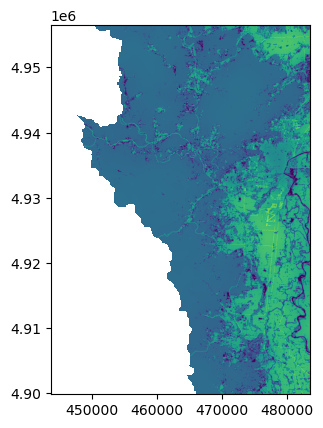

<Axes: >

In [2]:
# Create a graph of the tif file. 
import rasterio
from rasterio.plot import show
fp = r'C:\\Users\\ryanm\\Dropbox ' '(Personal)\\Github\\base_data\\invest_sample_data\\pollination\\output\\total_pollinator_abundance_spring.tif'
img = rasterio.open(fp)
show(img)

## Question 5

I changed the input value for relative abundance for the four bee species in the guild table. 

In [16]:
# Change arguments for biophyscial values
import pandas as pd
guild_table = pd.read_csv('C:\\Users\\ryanm\\Dropbox '
                        '(Personal)\\Github\\base_data\\invest_sample_data\\pollination\\guild_table.csv')
# Create abundance levels from 0% to 100%
rate_1 = [0, 0, 0, 0]
rate_2 = [0.1, 0.1, 0.1, 0.1]
rate_3 = [0.2, 0.2, 0.2, 0.2]
rate_4 = [0.3, 0.3, 0.3, 0.3]
rate_5 = [0.4, 0.4, 0.4, 0.4]
rate_6 = [0.5, 0.5, 0.5, 0.5]
rate_7 = [0.6, 0.6, 0.6, 0.6]
rate_8 = [0.7, 0.7, 0.7, 0.7]
rate_9 = [0.8, 0.8, 0.8, 0.8]
rate_10 = [0.9, 0.9, 0.9, 0.9]
rate_11 = [1, 1, 1, 1]

guild_table = guild_table.rename(columns= {"relative_abundance": "relative_abundance_og"})
guild_table = guild_table.assign(relative_abundance_0 = rate_1, relative_abundance_1 = rate_2, relative_abundance_2 = rate_3,
                                 relative_abundance_3 = rate_4, relative_abundance_4 = rate_5, relative_abundance_5 = rate_6,
                                 relative_abundance_6 = rate_7, relative_abundance_7 = rate_8, relative_abundance_8 = rate_9,
                                 relative_abundance_9 = rate_10, relative_abundance_10 = rate_11)
guild_table

,SPECIES,nesting_suitability_cavity_index,nesting_suitability_ground_index,foraging_activity_spring_index,foraging_activity_summer_index,alpha,relative_abundance_og,relative_abundance_0,relative_abundance_1,relative_abundance_2,relative_abundance_3,relative_abundance_4,relative_abundance_5,relative_abundance_6,relative_abundance_7,relative_abundance_8,relative_abundance_9,relative_abundance_10
0,Apis,1,1,1.0,1,500,0.75,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1
1,Bombus,1,0,0.8,1,1500,1.00,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1
2,Apis2,0,1,1.0,1,750,0.75,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1
3,Bombus2,0,1,0.8,1,750,1.00,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1


In [ ]:
# Interate over this change in 

# Justin, I was struggling to do this. Perhaps I needed to make ten different datasets with the same variable name instead of 1 dataset. 
# It seems like the key paramter to change here is _RELATIVE_SPECIES_ABUNDANCE_FIELD = 'relative_abundance' and swap out what is being called.

# Update the guild-table-path
# args = {
#     'guild_table_path': guild_table,
# }

# if __name__ == '__main__':
#     natcap.invest.pollination.execute(args)